# Dataset
NASA Turbofan Jet Engine Data Set
*   
*   source:  https://www.kaggle.com/datasets/behrad3d/nasa-cmaps

#Implement Backward Elemination Feasture Selection (0.5)


In [1]:

import pandas as pd
import numpy as np

In [7]:
df = pd.read_excel('Elements_dataset  (1).xlsx')


In [9]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
print(df.head())

   weight  category  letter  clarity  quality  table  price     x     y     z
0    0.23         2       1        3     61.5   55.0    326  3.95  3.98  2.43
1    0.21         3       1        2     59.8   61.0    326  3.89  3.84  2.31
2    0.23         1       1        4     56.9   65.0    327  4.05  4.07  2.31
3    0.29         3       5        5     62.4   58.0    334  4.20  4.23  2.63
4    0.31         1       6        3     63.3   58.0    335  4.34  4.35  2.75


In [12]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_normalized.head())

     weight  category    letter   clarity   quality     table     price  \
0  0.006237      0.50  0.166667  0.428571  0.513889  0.230769  0.000000   
1  0.002079      0.75  0.166667  0.285714  0.466667  0.346154  0.000000   
2  0.006237      0.25  0.166667  0.571429  0.386111  0.423077  0.000054   
3  0.018711      0.75  0.833333  0.714286  0.538889  0.288462  0.000433   
4  0.022869      0.25  1.000000  0.428571  0.563889  0.288462  0.000487   

          x         y         z  
0  0.367784  0.067572  0.076415  
1  0.362197  0.065195  0.072642  
2  0.377095  0.069100  0.072642  
3  0.391061  0.071817  0.082704  
4  0.404097  0.073854  0.086478  


In [13]:
X = df_normalized.drop('price', axis=1)
y = df_normalized['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.005092981791618134
R-squared: 0.8872658964238789




---



# Check three assumptions of the linear regression model (1.5)
Comment on each assumption, show wheather it's satsified or not.
Interpret each graph you will generate.
If any assumption is not satsifed, try to fix it and re-run the model, then compare before and after.

First Assumption (0.5)

Residual Calculation
         Actual  Predicted  Residuals
39087  0.051900   0.015599   0.036301
30893  0.027085   0.023604   0.003482
45278  0.092447   0.232470  -0.140023
16398  0.368222   0.306369   0.061853
13653  0.304103   0.351460  -0.047357




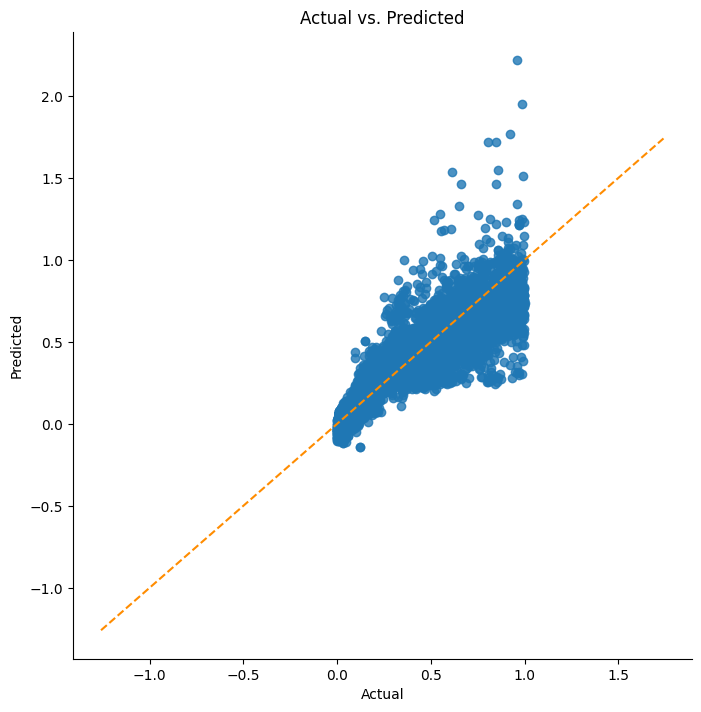

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Initialize model and data (assuming Boston dataset is loaded)
features = X_train
label = y_train

# Predictions and residuals
predictions = model.predict(features)
df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
df_results['Residuals'] = df_results['Actual'] - df_results['Predicted']

print("Residual Calculation")
print(df_results.head())
print("\n")

# Plotting
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

Interpretation



---



Second Assumption (0.5)

p-value: 0.0
Residuals NOT normally distributed


<ipython-input-20-ace5a34ca0cb>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


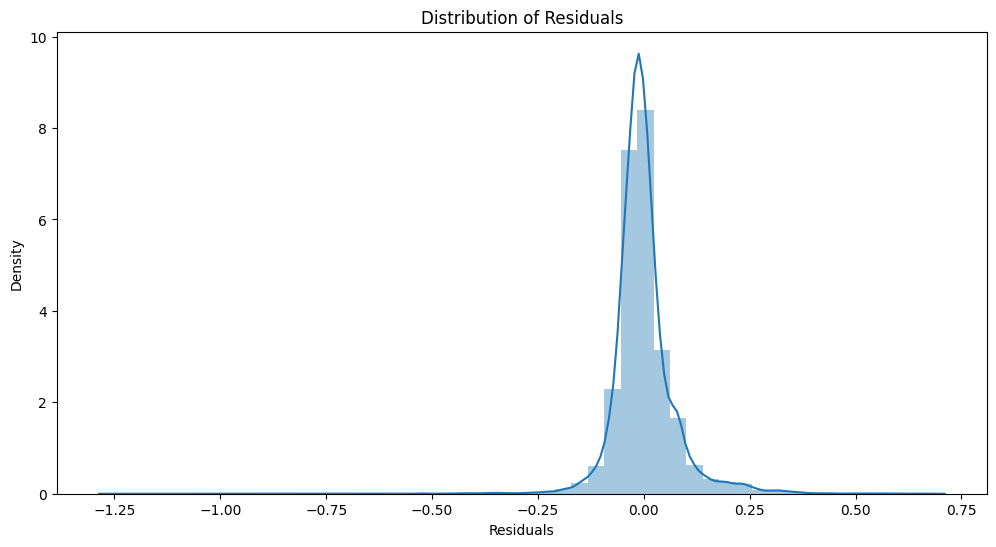

Skewness: 0.579234493847636


In [20]:
from statsmodels.stats.diagnostic import normal_ad


p_value = normal_ad(df_results['Residuals'])[1]
print(f'p-value: {p_value}')
p_value_thresh = 0.05

if p_value < p_value_thresh:
    print('Residuals NOT normally distributed')
else:
    print('Residuals normally distributed')

plt.figure(figsize=(12, 6))
sns.distplot(df_results['Residuals'])
plt.title('Distribution of Residuals')
plt.show()

print(f"Skewness: {df_results['Residuals'].skew()}")

Interpretation



---



Third Assumption (0.5)

In [21]:
from statsmodels.stats.stattools import durbin_watson

print('Assumption 4: No Autocorrelation')
print('Performing Durbin-Watson Test')
durbinWatson = durbin_watson(df_results['Residuals'])
print(f'Durbin-Watson: {durbinWatson}')

if durbinWatson < 1.5:
    print('Positive autocorrelation detected')
elif durbinWatson > 2.5:
    print('Negative autocorrelation detected')
else:
    print('No significant autocorrelation')

Assumption 4: No Autocorrelation
Performing Durbin-Watson Test
Durbin-Watson: 2.0058219371145687
No significant autocorrelation


Interpretation



---



#Interpret the z score and p-value of each feature, what are the features that you will select? Select them and re-run the model. Compare between the two models performances' before and after selecting the features. (bounce 0.5)


#Thank You!